## Stock News Analysis

#### Background
I previously experimented with a sentiment/morality lexicon created by researchers at my university by creating a simple [sentiment analyzer](https://github.com/rohankatakam/SentimentAnalyzer/blob/master/sentiment_analyzer.ipynb). I borrowed the core functionality from that project to help me analyze stock news. 

#### Core Functionality
The program collects a number of news articles for a given stock ticker, parses each article and derives the positive and negative sentiment percentages. The difference in the mean of the positive and negative percentages of all the articles are taken to find a net sentiment value.


#### High Points
I have found that the algorithm, yet simple, is quite effective and produces relatively accurate results when I look at how stocks are performing over time periods (in reality) and comparing this to what my algorithm produces over these respective periods. Further down, I will show you examples of this testing.

#### Drawbacks
The running time is quite slow. I am looking into ways how to speed it up, however I don't believe that it is possible to make it much faster. The running time is completely dependent on what your `limit` parameter is in the `getNews()` function. `limit` essentially specifies how many articles you want to include in your calculation. Of course, parsing more articles will take more time. However, gathering more artiucles will produce higher accuracy. When I am calling `getNews()` from other functions, I am setting `limit=5` because I feel that that provides the best balance between speed and accuracy. 


#### Future
I plan on integrating NLTK VADER to provide even more accurate results. My goal is to implement this sentiment analysis in a stock trading program eventually.

In [2]:
import pandas as pd
from datetime import datetime
from newspaper import Article
import matplotlib.pyplot as plt
from pygooglenews import GoogleNews
from newspaper import Config
from bs4 import BeautifulSoup
from requests import get
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

/Users/rohankatakam/.local/share/virtualenvs/invest-P10rcmgb/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#### Lexicon Parsing

df = pd.read_csv('data.txt',sep ="|", names = ['token', 'pos','syn_label','lemma', 'm_desc', 'm_type'])
df['token']= df['token'].str.split(" = ", n = 1, expand = True)[1]
df['pos']= df['pos'].str.split(" = ", n = 1, expand = True)[1]
df['syn_label']= df['syn_label'].str.split(" = ", n = 1, expand = True)[1]
df['lemma']= df['lemma'].str.split(" = ", n = 1, expand = True)[1]
df['m_desc']= df['m_desc'].str.split(" = ", n = 1, expand = True)[1]
df['m_type']= df['m_type'].str.split(" = ", n = 1, expand = True)[1]
df.shape 

#(4636, 6)
df.to_csv ('data.csv', index = None, header=True)

In [4]:
def get_stock_info(ticker):
    url = "https://finance.yahoo.com/quote/" + ticker + "/profile?p=" + ticker
    response = get(url)
    soup = BeautifulSoup(response.text)
    name = ""
    sector = ""
    industry = ""
    try:
        sector = soup.find("span", {"data-reactid": "21"}).text
        industry = soup.find("span", {"data-reactid": "25"}).text
        name = soup.find("h3", {"data-reactid": "6"}).text
        if sector == "Sector":
            sector = soup.find("span", {"data-reactid": "23"}).text
        if industry == "Industry":
            industry = soup.find("span", {"data-reactid": "27"}).text
    except:
        name = "Unavailable"
        sector = "Unavailable"
        industry = "Unavailable"
    
    return (name, sector, industry)

In [5]:
### TickerDF
## Returns dataframe of data for a stock from start to end day
# ticker: string (ex: "MSFT")
# start : tuple/array (ex: (2020, 1, 3), [2020, 1, 3])
# end : tuple/array (ex: (2020, 1, 3), [2020, 1, 3])
def TickerDF(ticker, start, end):
    return web.DataReader(ticker, 'yahoo', datetime(start[2],start[0],start[1]), datetime(end[2],end[0],end[1]))

In [6]:
def df_string(text):
    # Array of all lowercase words in 'text'
    str_arr = text.lower().split()
                
    # Virtues in lexicon
    virtues = ["CareVirtue", "CareVice", "FairnessVirtue", "FairnessVice", "IngroupVirtue", "IngroupVice", "AuthorityVirtue", "AuthorityVice","PurityVirtue", "PurityVice", "GeneralVirtue", "GeneralVice"]
    
    # Arrays of each virtue which will contain words that pertain
    care = []
    harm = []
    fairness = []
    cheating = []
    loyalty = []
    betrayal = []
    authority = []
    subversion = []
    purity = []
    degradation = []
    generalvirtue = []
    generalvice = []
    
    # Sort through each word in lexicon
    for word in df["token"].values:
        # Check if word from lexicon is in speech_arr
        if str_arr.count(word) != 0 :
            # Get respective virtue of word
            virtue = df.loc[df['token'] == word]["m_desc"].values[0]
            
            # Append (word, virtue) to respective virtue array
            if virtue == "CareVirtue" and not((word, str_arr.count(word)) in care):
                care.append((word, str_arr.count(word)))
            if virtue == "CareVice" and not((word, str_arr.count(word)) in harm):
                harm.append((word, str_arr.count(word)))
            if virtue == "FairnessVirtue" and not((word, str_arr.count(word)) in fairness):
                fairness.append((word, str_arr.count(word)))
            if virtue == "FairnessVice" and not((word, str_arr.count(word)) in cheating):
                cheating.append((word, str_arr.count(word)))
            if virtue == "IngroupVirtue" and not((word, str_arr.count(word)) in loyalty):
                loyalty.append((word, str_arr.count(word)))
            if virtue == "IngroupVice" and not((word, str_arr.count(word)) in betrayal):
                betrayal.append((word, str_arr.count(word)))
            if virtue == "AuthorityVirtue" and not((word, str_arr.count(word)) in authority):
                authority.append((word, str_arr.count(word)))
            if virtue == "AuthorityVice" and not((word, str_arr.count(word)) in subversion):
                subversion.append((word, str_arr.count(word)))
            if virtue == "PurityVirtue" and not((word, str_arr.count(word)) in purity):
                purity.append((word, str_arr.count(word)))
            if virtue == "PurityVice" and not((word, str_arr.count(word)) in degradation):
                degradation.append((word, str_arr.count(word)))
            if virtue == "GeneralVirtue" and not((word, str_arr.count(word)) in generalvirtue):
                generalvirtue.append((word, str_arr.count(word)))
            if virtue == "GeneralVice" and not((word, str_arr.count(word)) in generalvice):
                generalvice.append((word, str_arr.count(word)))


    # Create new Data Frame with Virtue, Number, and Words
    data = [['Care', len(care), care], ['Harm', len(harm), harm], ['Fairness', len(fairness), fairness], ['Cheating', len(cheating), cheating], ['Loyalty', len(loyalty), loyalty], ['Betrayal', len(betrayal), betrayal], ['Authority', len(authority), authority], ['Subversion', len(subversion), subversion], ['Purity', len(purity), purity], ['Degradation', len(degradation), degradation], ['General Virtue', len(generalvirtue), generalvirtue], ['General Vice', len(generalvice), generalvice]] 
    
    # Return Data Frame to be used for further use
    return(pd.DataFrame(data, columns = ['Virtue', 'Number', 'Words']))

In [7]:
def get_news(ticker, start_date, end_date, limit):
    gn = GoogleNews()
    
    stock_info = get_stock_info(ticker)
    
    
    search = gn.search(stock_info[0] + " " + ticker, from_ = start_date, to_ = end_date)
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
    config = Config()
    config.browser_user_agent = user_agent
    
    news = []

    
    for row in search['entries']:
        if(len(news) == limit):
            return news
        
        
        try:
            article = Article(row['links'][0]['href'], config=config)
            article.download()
            article.parse()   

            if([ele for ele in stock_info[0].lower().split() if(ele in row['title'].lower())]):
                news.append({
                    'title' : row['title'],
                    'semantic_df' : df_string(article.text),
                    'article_length' : len(article.text)
                })
                
                
        except:
            pass

    
    return news

In [8]:
def negPercent(df, article_length):
    return (df[df["Virtue"] == "Harm"]['Number'].values[0] +
    df[df["Virtue"] == "Cheating"]['Number'].values[0] + 
    df[df["Virtue"] == "Betrayal"]['Number'].values[0] + 
    df[df["Virtue"] == "Subversion"]['Number'].values[0])/article_length

In [9]:
def posPercent(df, article_length):
    return (df[df["Virtue"] == "Care"]['Number'].values[0] +
    df[df["Virtue"] == "Fairness"]['Number'].values[0] + 
    df[df["Virtue"] == "Loyalty"]['Number'].values[0] + 
    df[df["Virtue"] == "Authority"]['Number'].values[0])/article_length

In [10]:
def netSentiment(news):
    if len(news) == 0:
        return None
    pos_percents = []
    neg_percents = []
    for i in range(len(news)):
        pos_percents.append(posPercent(news[i]['semantic_df'], news[i]['article_length']))
        neg_percents.append(negPercent(news[i]['semantic_df'], news[i]['article_length']))

    return ((np.mean(pos_percents) - np.mean(neg_percents)) * 1000)

In [11]:
def valueCategory(value):
    if type(value) == float:
        if value > 3.5:
            color = 'darkgreen'
        elif value > 2.5:
            color = 'green'
        elif value > 1.5:
            color = 'yellow'
        elif value > 1.0:
            color = 'red'
        else:
            color = 'darkred'

        return 'background-color: %s' % color
    else:
        return 'color: %s' % 'black'

In [12]:
def sentimentTable(stocks, from_, to_):
    data = []
    for stock in stocks:
        data.append([stock, netSentiment(get_news(stock, from_, to_, 5))])
    
    return pd.DataFrame(data, columns = ['Stock', 'Net Sentiment']).sort_values(by=['Net Sentiment'], ascending=False).style.applymap(valueCategory)

## Testing

### Data Gathering
Here, I am creating a sentiment table for the same four stock tickers for three different week spans. 
+ 6/7 - 6/13/20
+ 7/5 - 7/11/20
+ 7/8 - 7/14/20

In [13]:
june_week = sentimentTable(["ATVI", "BABA", "EROS", "NIO"], '2020-06-12', '2020-06-18')

In [15]:
july_week = sentimentTable(["ATVI", "BABA", "EROS", "NIO"], '2020-07-05', '2020-07-11')

In [16]:
recent_week = sentimentTable(["ATVI", "BABA", "EROS", "NIO"], '2020-07-08', '2020-07-14')

### Conclusions

#### Early June Week
+ NIO was highly praised by news sources according to the algorithm. It is nearly an outlier in this data.
+ BABA also was reflected favorably, however not the extent of NIO

In [14]:
june_week

,Stock,Net Sentiment
3,NIO,4.959670
1,BABA,2.709063
2,EROS,2.484812
0,ATVI,1.609223


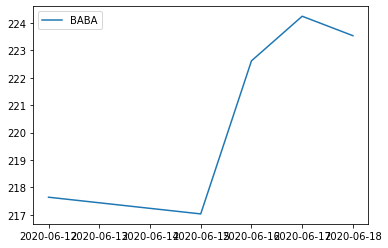

In [17]:
plt.plot(TickerDF("BABA", (6,12,2020), (6,18,2020))['Close'], label="BABA")
plt.legend()
plt.show()

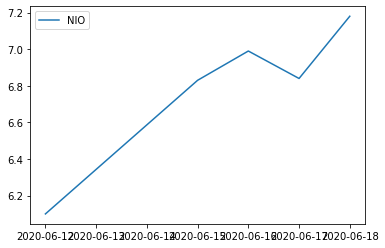

In [19]:
plt.plot(TickerDF("NIO", (6,12,2020), (6,18,2020))['Close'], label="NIO")
plt.legend()
plt.show()

#### Early July Week
+ NIO fell significantly in Net Sentiment
+ BABA increased marginally in Net Sentiment
+ ATVI continues to struggle against the algorithm

In [20]:
july_week

,Stock,Net Sentiment
1,BABA,3.537082
2,EROS,2.637978
3,NIO,1.825364
0,ATVI,1.629934


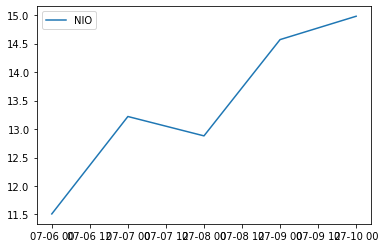

In [122]:
plt.plot(TickerDF("NIO", (7,5,2020), (7,11,2020))['Close'], label="NIO")
plt.legend()
plt.show()

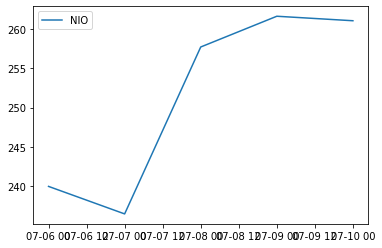

In [125]:
plt.plot(TickerDF("BABA", (7,5,2020), (7,11,2020))['Close'], label="BABA")
plt.legend()
plt.show()

#### Most Recent Week
+ NIO fell to bottom of table
+ BABA has kept a strong Net Sentiment.
+ ATVI and EROS are not particularly praised well

NOTE: Jack Ma sold $9.6b in BABA shares yesterday (7/13/2020), which was likely the cause in the recent large dip. Although, if you read through articles about BABA, they still remain highly favorable of the stock

In [103]:
recent_week

,Stock,Net Sentiment
1,BABA,3.403591
2,EROS,1.927996
0,ATVI,1.809762
3,NIO,1.495878


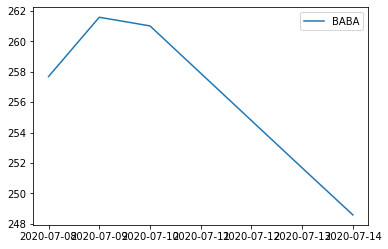

In [21]:
plt.plot(TickerDF("BABA", (7,8,2020), (7,14,2020))['Close'], label="BABA")
plt.legend()
plt.show()

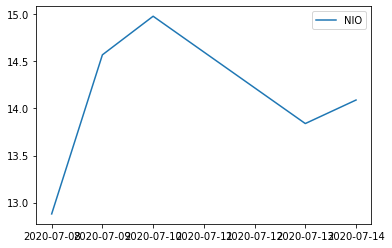

In [123]:
plt.plot(TickerDF("NIO", (7,8,2020), (7,14,2020))['Close'], label="NIO")
plt.legend()
plt.show()